In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA


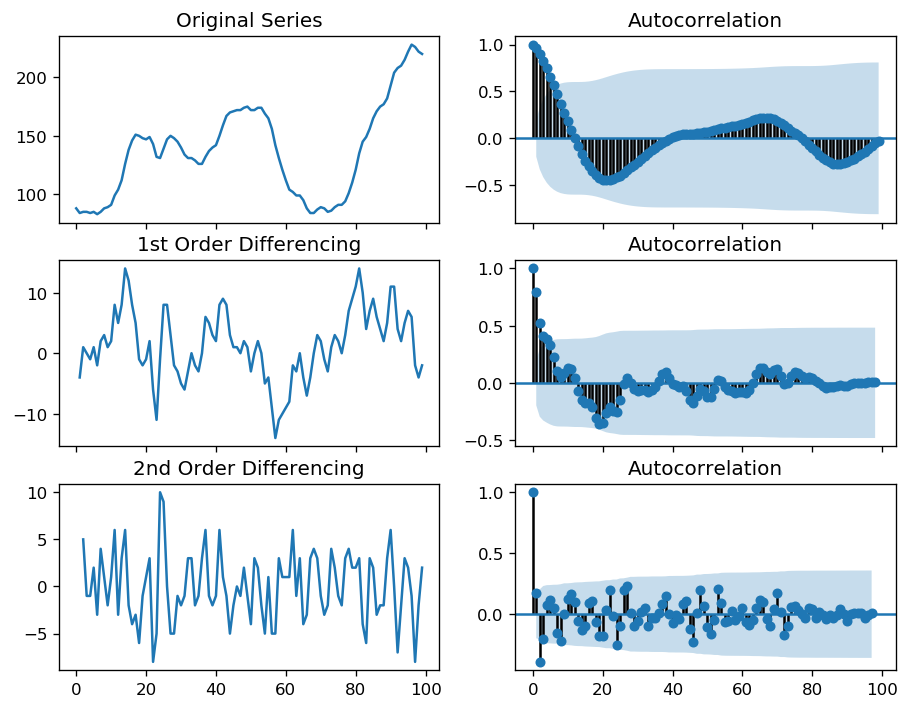

In [3]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [4]:
df.head()

,value
0,88
1,84
2,85
3,85
4,84


In [5]:
data = pd.read_csv("DK-DK2.csv")
data["datetime"] = pd.to_datetime(data['datetime'])
data["datetime"] = data["datetime"].dt.date

In [6]:
univData = data[["carbon_intensity_avg"]]
univData = univData.dropna()
univData = univData.reset_index(drop=True)

In [7]:
univData.head()

,carbon_intensity_avg
0,373.839203
1,366.705180
2,369.486480
3,383.885912
4,383.386516


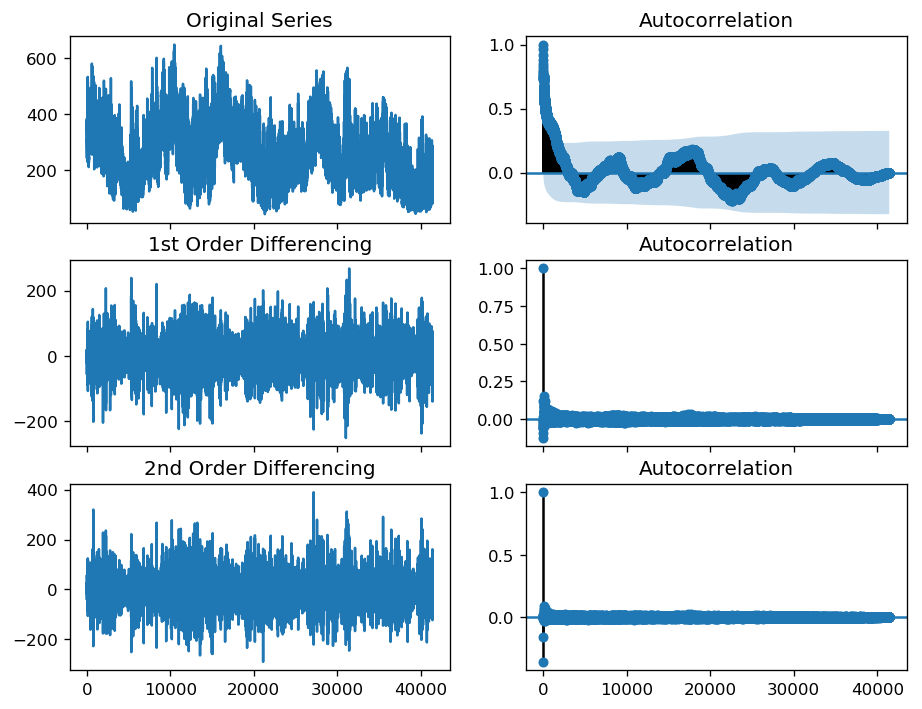

In [8]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(univData.carbon_intensity_avg); axes[0, 0].set_title('Original Series')
plot_acf(univData.carbon_intensity_avg, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(univData.carbon_intensity_avg.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(univData.carbon_intensity_avg.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(univData.carbon_intensity_avg.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(univData.carbon_intensity_avg.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(univData.carbon_intensity_avg.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(univData.carbon_intensity_avg.diff().dropna(), ax=axes[1])

plt.show()

In [48]:
model = ARIMA(y, order=(0,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                                ARIMA Model Results                                
Dep. Variable:     D2.carbon_intensity_avg   No. Observations:                41444
Model:                      ARIMA(0, 2, 0)   Log Likelihood             -208935.123
Method:                                css   S.D. of innovations             37.429
Date:                     Tue, 15 Oct 2019   AIC                         417874.246
Time:                             15:31:43   BIC                         417891.510
Sample:                                  2   HQIC                        417879.701
                                                                                   
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.022e-05      0.184     -0.000      1.000      -0.360       0.360


In [49]:
model = ARIMA(y, order=(0,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                                ARIMA Model Results                                
Dep. Variable:     D2.carbon_intensity_avg   No. Observations:                41444
Model:                      ARIMA(0, 2, 0)   Log Likelihood             -208935.123
Method:                                css   S.D. of innovations             37.429
Date:                     Tue, 15 Oct 2019   AIC                         417874.246
Time:                             15:31:56   BIC                         417891.510
Sample:                                  2   HQIC                        417879.701
                                                                                   
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.022e-05      0.184     -0.000      1.000      -0.360       0.360


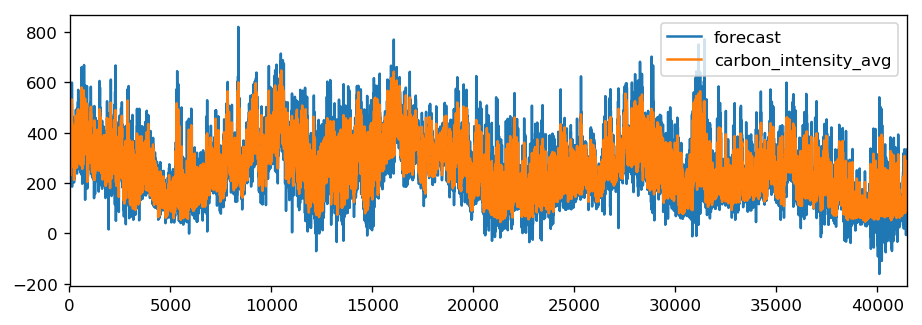

In [50]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [51]:
train = y[:35000]
test = y[35000:]

In [65]:
model = ARIMA(train, order=(2, 1, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(6446, alpha=0.05)  # 95% conf

In [66]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

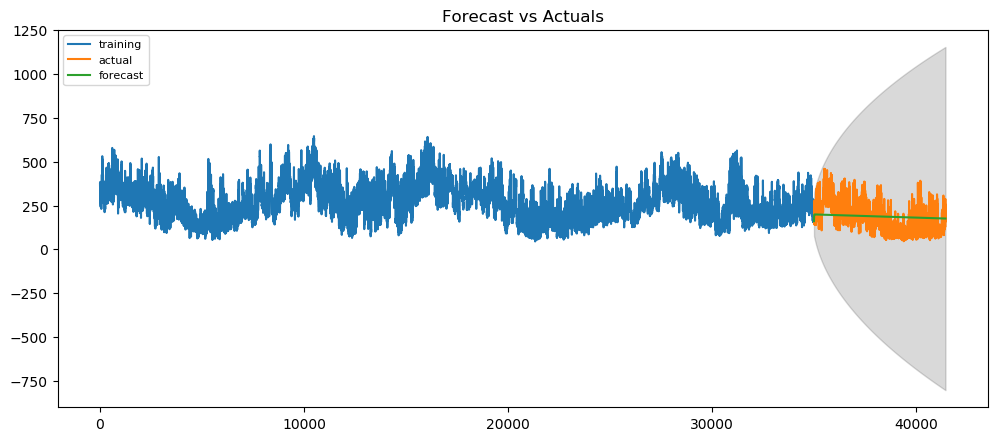

In [67]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [64]:
model = ARIMA(train, order=(0, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                                ARIMA Model Results                                
Dep. Variable:     D2.carbon_intensity_avg   No. Observations:                34998
Model:                      ARIMA(0, 2, 1)   Log Likelihood             -166722.506
Method:                            css-mle   S.D. of innovations             28.352
Date:                     Tue, 15 Oct 2019   AIC                         333451.013
Time:                             15:43:01   BIC                         333476.402
Sample:                                  2   HQIC                        333459.100
                                                                                   
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1.632e-07   1.68e-05      0.010      0.992   -3.28e-05    3.32e-05
ma.L1.D2.carbon_intensity_avg    -

In [9]:
from pmdarima.arima.utils import ndiffs


In [10]:
y = univData.carbon_intensity_avg

In [12]:
## Adf Test
print(ndiffs(y, test='adf'))  

# KPSS test
print(ndiffs(y, test='kpss'))  

# PP test:
print(ndiffs(y, test='pp'))

0
1
0


In [19]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.151343
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [74]:
my_order = (1,1,1)
my_seasonal_order = (1,1,1,12)

In [75]:
model = SARIMAX(y,order=my_order,seasonal_order=my_seasonal_order)

In [76]:
model_fit = model.fit()

In [77]:
yhat = model_fit.forecast()

In [78]:
yhat = model_fit.predict(start=len(y),end=len(data))

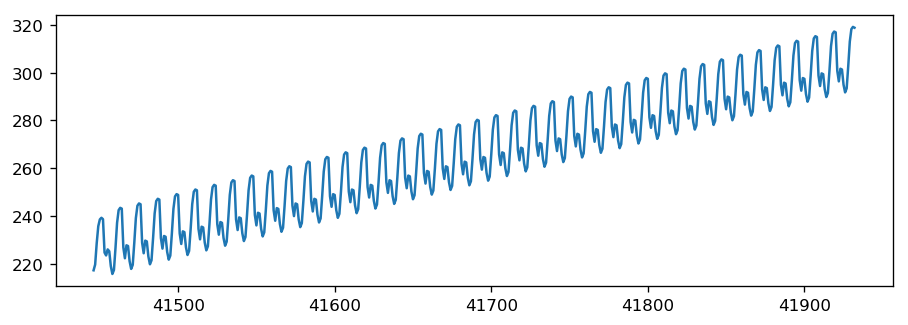

In [79]:
plt.plot(yhat)